In [ ]:
import tensorflow as tf
print(tf.__version__)

2.14.0


In [ ]:
!wget --no-check-certificate \
  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2023-12-13 06:26:05--  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip
Resolving dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)... 104.18.12.192, 104.18.13.192, 2606:4700::6812:dc0, ...
Connecting to dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)|104.18.12.192|:443... connected.
HTTP request sent, awaiting response... 200 OK
Cookie coming from dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com attempted to set domain to digitaloceanspaces.com
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M   113MB/s    in 0.6s    

2023-12-13 06:26:06 (113 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [ ]:
#melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
os.listdir('/tmp/images/train')

['clean', 'messy']

In [ ]:
os.listdir('/tmp/images/val')

['clean', 'messy']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir, #direktori data latih
    target_size = (150, 150), #mengubah resolusi seluruh gambar menjadi 150*150 px
    batch_size = 4,
    #karena ini merupakan masalah klasifikasi 2 kelas, gunakan class_mode = 'binary
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, #direktori data validasi
    target_size = (150, 150), #mengubah resolusi seluruh gambar menjadi 150*150 px
    batch_size = 4, #kerena ini merupakan masalah klasifikasi 2 kelas gunakan class_mode = 'binary'
    class_mode = 'binary'
)

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(512, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [ ]:
#compile model dengan 'adam' optimizer loss function 'binary_crossentropy'
model.compile(loss = 'binary_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics = ['accuracy'])

In [ ]:
#latih model dengan model.fit
model.fit(
    train_generator,
    steps_per_epoch = 25, #berapa batch yang akan dieksekusi pada setiap epoch
    epochs = 25, #tambahkan epoch jika akurasi model belum optimal
    validation_data = validation_generator, #menampilkan akurasi pengujuan data validasi
    validation_steps = 5, #berapa batch yang akan dieksekusi pada setiap epoch
    verbose = 2
)

Epoch 1/25
25/25 - 14s - loss: 0.0873 - accuracy: 0.9800 - 14s/epoch - 541ms/step
Epoch 2/25
25/25 - 13s - loss: 0.0461 - accuracy: 0.9900 - 13s/epoch - 520ms/step
Epoch 3/25
25/25 - 13s - loss: 0.0519 - accuracy: 0.9800 - 13s/epoch - 509ms/step
Epoch 4/25
25/25 - 13s - loss: 0.0647 - accuracy: 0.9900 - 13s/epoch - 539ms/step
Epoch 5/25
25/25 - 13s - loss: 0.0504 - accuracy: 0.9800 - 13s/epoch - 539ms/step
Epoch 6/25
25/25 - 13s - loss: 0.1862 - accuracy: 0.9500 - 13s/epoch - 538ms/step
Epoch 7/25
25/25 - 15s - loss: 0.0925 - accuracy: 0.9600 - 15s/epoch - 604ms/step
Epoch 8/25
25/25 - 14s - loss: 0.0826 - accuracy: 0.9700 - 14s/epoch - 544ms/step
Epoch 9/25
25/25 - 14s - loss: 0.1278 - accuracy: 0.9700 - 14s/epoch - 546ms/step
Epoch 10/25
25/25 - 13s - loss: 0.1013 - accuracy: 0.9700 - 13s/epoch - 524ms/step
Epoch 11/25
25/25 - 13s - loss: 0.0206 - accuracy: 1.0000 - 13s/epoch - 519ms/step
Epoch 12/25
25/25 - 13s - loss: 0.1183 - accuracy: 0.9900 - 13s/epoch - 532ms/step
Epoch 13/25
2

Saving WIN_20231211_13_25_22_Pro.jpg to WIN_20231211_13_25_22_Pro (2).jpg
1/1 [==============================] - 0s 45ms/step
WIN_20231211_13_25_22_Pro (2).jpg
Clean


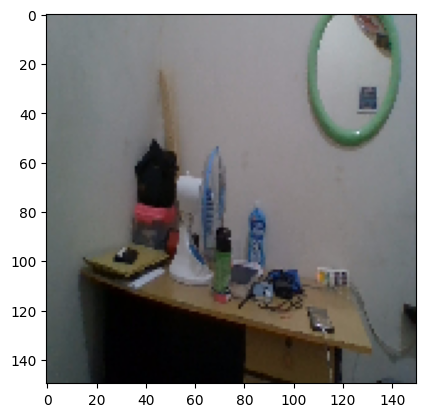

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  #predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes == 0:
    print('Clean')
  else:
    print('Messy')